In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Acquire the data from a .csv file that was saved locally
#For more information on acquiring the data for replication, please refer to the README in this repo
df = pd.read_csv('open-broadway-data 2021-04-08.csv')

In [3]:
#Preview the dataframe
df.head(1)

,show_id,Show Title,Year,Previews Date,Opening Date,Closing Date,Theatre Name,Production Type,Show Type,Show Type (Simple),...,N Creative Team,theatre_id,Theatre Full Address,Theatre Street Address,Theatre Address Locality,Theatre Address Region,Theatre Postal Code,Theatre Year Closed,Theatre Year Demolished,Theatre Capacity
0,322333,King Richard III,1750,NaN,1750-03-05,1750-03-12,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN


## Data Preparation

In [10]:
#What does the dataframe contain?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   11053 non-null  int64  
 1   Show Title                11053 non-null  object 
 2   Year                      11053 non-null  int64  
 3   Previews Date             419 non-null    object 
 4   Opening Date              10996 non-null  object 
 5   Closing Date              5255 non-null   object 
 6   Theatre Name              10965 non-null  object 
 7   Production Type           11053 non-null  object 
 8   Show Type                 11053 non-null  object 
 9   Show Type (Simple)        11053 non-null  object 
 10  Intermissions             2409 non-null   float64
 11  N Performances            8835 non-null   float64
 12  Run Time                  2 non-null      float64
 13  Show Not Opened           11053 non-null  bool   
 14  Reviva

In [ ]:
#Stats for the dataframe
df.describe()

In [ ]:
#Confirm show id is unique so that it can become the index
df.show_id.nunique()

**Takeaways and next steps:**
- Check if show_id is unique and can be reset to index
- A lot of nulls in previews date ==> Drop this column?
- Some missing opening dates ==> Were these shows that never opened?
- A LOT of missing closing dates...this may actually affect the target if it can't be imputed
- Small number of missing theatre names...can I impute from other columns?
- Missing values in intermissions...does that mean there wasn't an intermission or is that data missing?
- Missing vales in  N performances...but more data points than closing date...may be helpful as a secondary target if I lose too much data due to missing values in closing date
- Drop run time
- Other titles missing... use domain knowledge to verify I can just drop this column
- Drop Official website under the assumption that it doesn't impact the target
- theatre_id...probably captured in theatre name
- Address info...keep one feature and drop the others? Location may matter, but maybe that is captured or can be inferred from theatre name? / Engineer a feature for visibility of theatre /promity to Broadway? May need to be done in future iteration but can see how this could be a driver of length of run.
- Some theatres closed...might be an interesting feature that supports drivers of length of run?
- Theatre capacity is definitely a nice feature, missing nulls...maybe impute with mean, median or mode?

In [ ]:
#Does opening data have any missing values that could be filled by previews date?

#Check to see what values have have missing opening and previes dates...
df[df['Opening Date'].isna() & df['Previews Date'].isna()]


In [5]:
#Create a separate datadframe to explore this...
df_no_close = df[df['Closing Date'].isna()]

In [6]:
df_no_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 1 to 11052
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   5798 non-null   int64  
 1   Show Title                5798 non-null   object 
 2   Year                      5798 non-null   int64  
 3   Previews Date             39 non-null     object 
 4   Opening Date              5757 non-null   object 
 5   Closing Date              0 non-null      object 
 6   Theatre Name              5740 non-null   object 
 7   Production Type           5798 non-null   object 
 8   Show Type                 5798 non-null   object 
 9   Show Type (Simple)        5798 non-null   object 
 10  Intermissions             832 non-null    float64
 11  N Performances            4356 non-null   float64
 12  Run Time                  1 non-null      float64
 13  Show Not Opened           5798 non-null   bool   
 14  Revival

In [7]:
df_no_close.describe()

,show_id,Year,Intermissions,N Performances,Run Time,N People,N Performers,N Creative Team,theatre_id,Theatre Year Closed,Theatre Year Demolished,Theatre Capacity
count,5798.000000,5798.000000,832.000000,4356.000000,1.0,5798.000000,5798.000000,5798.000000,5740.000000,1089.000000,3236.000000,4456.000000
mean,271612.488962,1916.279234,0.998798,68.256887,315.0,16.719731,13.876337,3.097102,6511.833449,1931.339761,1942.779666,1122.571140
std,108626.747206,22.193648,0.060072,87.114477,NaN,15.319300,13.869400,2.977818,957.967315,13.606412,32.059594,468.488673
min,15.000000,1750.000000,0.000000,1.000000,315.0,0.000000,0.000000,0.000000,5000.000000,1754.000000,1758.000000,178.000000
25%,313244.250000,1905.000000,1.000000,16.000000,315.0,7.000000,5.000000,2.000000,5369.000000,1929.000000,1925.000000,895.000000
50%,315036.500000,1920.000000,1.000000,36.000000,315.0,14.000000,12.000000,2.000000,7044.000000,1930.000000,1940.000000,1091.000000
75%,316950.750000,1928.000000,1.000000,86.000000,315.0,20.000000,17.000000,3.000000,7341.000000,1936.000000,1961.000000,1232.000000
max,333521.000000,2020.000000,2.000000,867.000000,315.0,142.000000,135.000000,72.000000,8051.000000,1989.000000,2004.000000,5200.000000


In [8]:
df_no_close[df_no_close["Closing Date"].isna() & (df_no_close['N Performances'] > 0)]

,show_id,Show Title,Year,Previews Date,Opening Date,Closing Date,Theatre Name,Production Type,Show Type,Show Type (Simple),...,N Creative Team,theatre_id,Theatre Full Address,Theatre Street Address,Theatre Address Locality,Theatre Address Region,Theatre Postal Code,Theatre Year Closed,Theatre Year Demolished,Theatre Capacity
83,322328,The King of Coney Island,1857,NaN,1857-06-30,NaN,Olympic Theatre,Original Production,Musical,Musical,...,2,7337.0,622 Broadway New York NY,622 Broadway,New York,NY,NaN,1880.0,1880.0,NaN
137,5943,Mazulm,1864,NaN,1864-07-11,NaN,Barnum's New Museum,Revival,Musical,Musical,...,1,5717.0,539-41 Broadway New York NY,539-41 Broadway,New York,NY,NaN,NaN,1868.0,NaN
157,7585,"Tom-Tom, the Piper's Son",1866,NaN,1866-12-03,NaN,Thèåtre Français,Original Production,Musical,Musical,...,2,5703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,7177,Sinbad the Sailor,1869,NaN,1869-05-29,NaN,Niblo's Garden,Original Production,Musical,Musical,...,2,7414.0,537 Broadway New York NY,537 Broadway,New York,NY,NaN,NaN,1895.0,NaN
226,7644,The Twelve Temptations!,1870,NaN,1870-02-07,NaN,Grand Opera House,Original Production,Musical,Musical,...,2,5720.0,8th Ave. & 23rd St. New York NY,8th Ave. & 23rd St.,New York,NY,NaN,NaN,1961.0,1890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,6150,My Favorite Year,1992,NaN,1992-12-10,NaN,Vivian Beaumont Theatre,Original Production,Musical,Musical,...,49,7482.0,150 West 65th St. at Broadway New York NY 10023,150 West 65th St. at Broadway,New York,NY,10023,NaN,NaN,1080.0
10181,5872,Mandy Patinkin in Concert,1997,NaN,1997-03-01,NaN,Lyceum Theatre,Original Production,Musical,Musical,...,8,5194.0,(Covent Garden/Charing Cross) Wellington Stree...,(Covent Garden/Charing Cross) Wellington Stree...,London,NaN,NaN,NaN,NaN,2075.0
10182,6684,Play On!,1997,NaN,1997-03-20,NaN,Brooks Atkinson Theatre,Original Production,Musical,Musical,...,33,5018.0,256 W. 47th St. New York NY,256 W. 47th St.,New York,NY,NaN,NaN,NaN,1094.0
10225,3008,Mandy Patinkin in Concert: Mamaloshen,1998,NaN,1998-10-13,NaN,Belasco Theatre,Original Production,Musical,Musical,...,12,5205.0,111 West 44th St. New York NY,111 West 44th St.,New York,NY,NaN,NaN,NaN,1018.0


**Questions**<br>
    - There are less missing values in number of performances than there are in closing date...<br>
        - Can I infer the number of weeks a show ran by number of performances? Assuming the standard broadway schedule?

In [9]:
df_no_close[df_no_close['Show Not Opened'] == False]

,show_id,Show Title,Year,Previews Date,Opening Date,Closing Date,Theatre Name,Production Type,Show Type,Show Type (Simple),...,N Creative Team,theatre_id,Theatre Full Address,Theatre Street Address,Theatre Address Locality,Theatre Address Region,Theatre Postal Code,Theatre Year Closed,Theatre Year Demolished,Theatre Capacity
1,313413,Spanish Friar,1750,NaN,1750-03-13,NaN,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN
2,313471,The Orphan,1750,NaN,1750-04-02,NaN,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN
3,313540,Love for Love,1750,NaN,1750-07-23,NaN,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN
4,313610,Cato,1750,NaN,1750-09-24,NaN,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN
6,313340,Othello,1751,NaN,1751-12-23,NaN,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,332792,West Side Story,2020,2019-12-10,2020-02-20,NaN,Broadway Theatre (Broadway),Revival,Musical,Musical,...,11,5017.0,1681 Broadway New York NY,1681 Broadway,New York,NY,NaN,NaN,NaN,1761.0
11048,333145,Girl from the North Country,2020,2020-02-07,2020-03-05,NaN,Belasco Theatre,Premiere,Musical,Musical,...,15,5205.0,111 West 44th St. New York NY,111 West 44th St.,New York,NY,NaN,NaN,NaN,1018.0
11049,333088,Who's Afraid of Virginia Woolf?,2020,2020-03-03,2020-03-11,NaN,Booth Theatre (Broadway),Revival,Play,Play,...,5,5334.0,222 West 45th St. New York NY,222 West 45th St.,New York,NY,NaN,NaN,NaN,766.0
11051,333347,The Lehman Trilogy,2020,2020-03-07,2020-03-26,NaN,Nederlander Theatre,Production,Play,Play,...,13,7047.0,208 W. 41st St. New York NY 10036,208 W. 41st St.,New York,NY,10036,NaN,NaN,1235.0


In [11]:
df.drop(columns={'Previews Date', 'Intermissions', 'N Performances', 'Run Time', 'Other Titles', 'Official Website', 'Theatre Postal Code'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   11053 non-null  int64  
 1   Show Title                11053 non-null  object 
 2   Year                      11053 non-null  int64  
 3   Opening Date              10996 non-null  object 
 4   Closing Date              5255 non-null   object 
 5   Theatre Name              10965 non-null  object 
 6   Production Type           11053 non-null  object 
 7   Show Type                 11053 non-null  object 
 8   Show Type (Simple)        11053 non-null  object 
 9   Show Not Opened           11053 non-null  bool   
 10  Revival                   11053 non-null  bool   
 11  N People                  11053 non-null  int64  
 12  N Performers              11053 non-null  int64  
 13  N Creative Team           11053 non-null  int64  
 14  theatr

In [16]:
df['Theatre Year Closed'].fillna('False', inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   11053 non-null  int64  
 1   Show Title                11053 non-null  object 
 2   Year                      11053 non-null  int64  
 3   Opening Date              10996 non-null  object 
 4   Closing Date              5255 non-null   object 
 5   Theatre Name              10965 non-null  object 
 6   Production Type           11053 non-null  object 
 7   Show Type                 11053 non-null  object 
 8   Show Type (Simple)        11053 non-null  object 
 9   Show Not Opened           11053 non-null  bool   
 10  Revival                   11053 non-null  bool   
 11  N People                  11053 non-null  int64  
 12  N Performers              11053 non-null  int64  
 13  N Creative Team           11053 non-null  int64  
 14  theatr

In [18]:
df['Theatre Year Demolished'].fillna('False', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   11053 non-null  int64  
 1   Show Title                11053 non-null  object 
 2   Year                      11053 non-null  int64  
 3   Opening Date              10996 non-null  object 
 4   Closing Date              5255 non-null   object 
 5   Theatre Name              10965 non-null  object 
 6   Production Type           11053 non-null  object 
 7   Show Type                 11053 non-null  object 
 8   Show Type (Simple)        11053 non-null  object 
 9   Show Not Opened           11053 non-null  bool   
 10  Revival                   11053 non-null  bool   
 11  N People                  11053 non-null  int64  
 12  N Performers              11053 non-null  int64  
 13  N Creative Team           11053 non-null  int64  
 14  theatr

In [22]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4572 entries, 55 to 11050
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   4572 non-null   int64  
 1   Show Title                4572 non-null   object 
 2   Year                      4572 non-null   int64  
 3   Opening Date              4572 non-null   object 
 4   Closing Date              4572 non-null   object 
 5   Theatre Name              4572 non-null   object 
 6   Production Type           4572 non-null   object 
 7   Show Type                 4572 non-null   object 
 8   Show Type (Simple)        4572 non-null   object 
 9   Show Not Opened           4572 non-null   bool   
 10  Revival                   4572 non-null   bool   
 11  N People                  4572 non-null   int64  
 12  N Performers              4572 non-null   int64  
 13  N Creative Team           4572 non-null   int64  
 14  theatr

## Data Exploration

<AxesSubplot:>

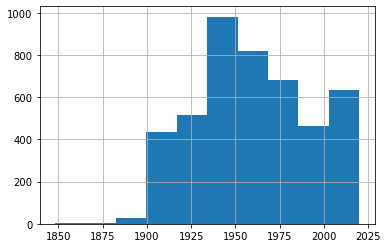

In [24]:
df.Year.hist()

<AxesSubplot:>

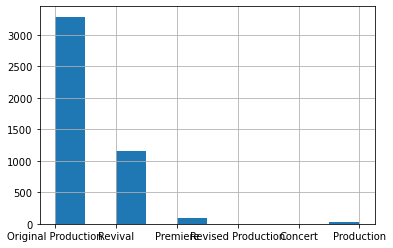

In [26]:
df['Production Type'].hist()

<AxesSubplot:>

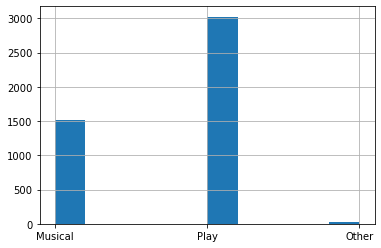

In [28]:
df['Show Type (Simple)'].hist()


<AxesSubplot:>

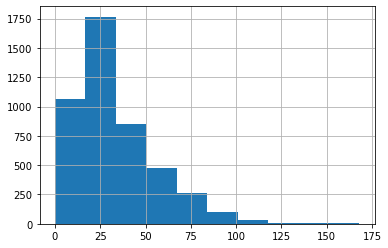

In [29]:
df['N People'].hist()

<AxesSubplot:>

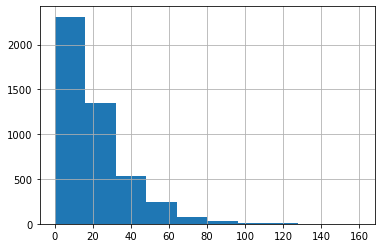

In [30]:
df['N Performers'].hist()

<AxesSubplot:>

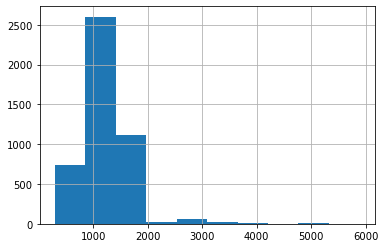

In [31]:
df['Theatre Capacity'].hist()